In [2]:
import random
from tvtk.api import tvtk
from mayavi import mlab
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import ipyvolume as ipv
import random
from IPython.display import display, Image 

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************




In [3]:
# Input parameters
input_file = r'C:\Users\meysa\OneDrive\Desktop\New folder\New folder\Berea_2d25um_grayscale_filtered.raw'
nx, ny, nz = 1000, 1000, 1000
chunk_size = 50

In [4]:
# Read raw data into 3D numpy array
with open(input_file, 'rb') as f:
    data = np.fromfile(f, dtype=np.uint8)
    img = data.reshape((nz, ny, nx))

In [5]:
# Split into chunks    
num_chunks = int(nx / chunk_size), int(ny / chunk_size), int(nz / chunk_size)
x_chunks = np.array_split(img, num_chunks[0], axis=0) 
y_chunks = [np.array_split(x, num_chunks[1], axis=1) for x in x_chunks]
z_chunks = [[np.array_split(y, num_chunks[2], axis=2) for y in x] for x in y_chunks]

chunks = z_chunks

# Save chunks to output folder
output_folder = 'image_chunks'
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

for z in range(num_chunks[2]):
    for y in range(num_chunks[1]):
        for x in range(num_chunks[0]):
            chunk = chunks[z][y][x]
            outfile = os.path.join(output_folder, f'chunk_{x}_{y}_{z}.npy')
            np.save(outfile, chunk)

In [13]:
# Function to generate random chunk
def generate_random_chunk(z_chunks):
    rand_z = random.randint(0, z_len-1)
    rand_y = random.randint(0, y_len-1)
    rand_x = random.randint(0, x_len-1)
    return z_chunks[rand_z][rand_y][rand_x]

# Define dimensions
z_len = len(z_chunks)
y_len = len(z_chunks[0])
x_len = len(z_chunks[0][0])

# Pick random chunk
chunk = generate_random_chunk(z_chunks)

# Render chunk with Mayavi offscreen
mlab.figure(size=(400, 300), bgcolor=(1, 1, 1))
vol = mlab.pipeline.volume(mlab.pipeline.scalar_field(chunk), vmin=0, vmax=50)  # Adjust color range here
vol.module_manager.scalar_lut_manager.number_of_colors = 50  # Decrease color resolution for a smaller range
mlab.colorbar(orientation='vertical')
mlab.show()

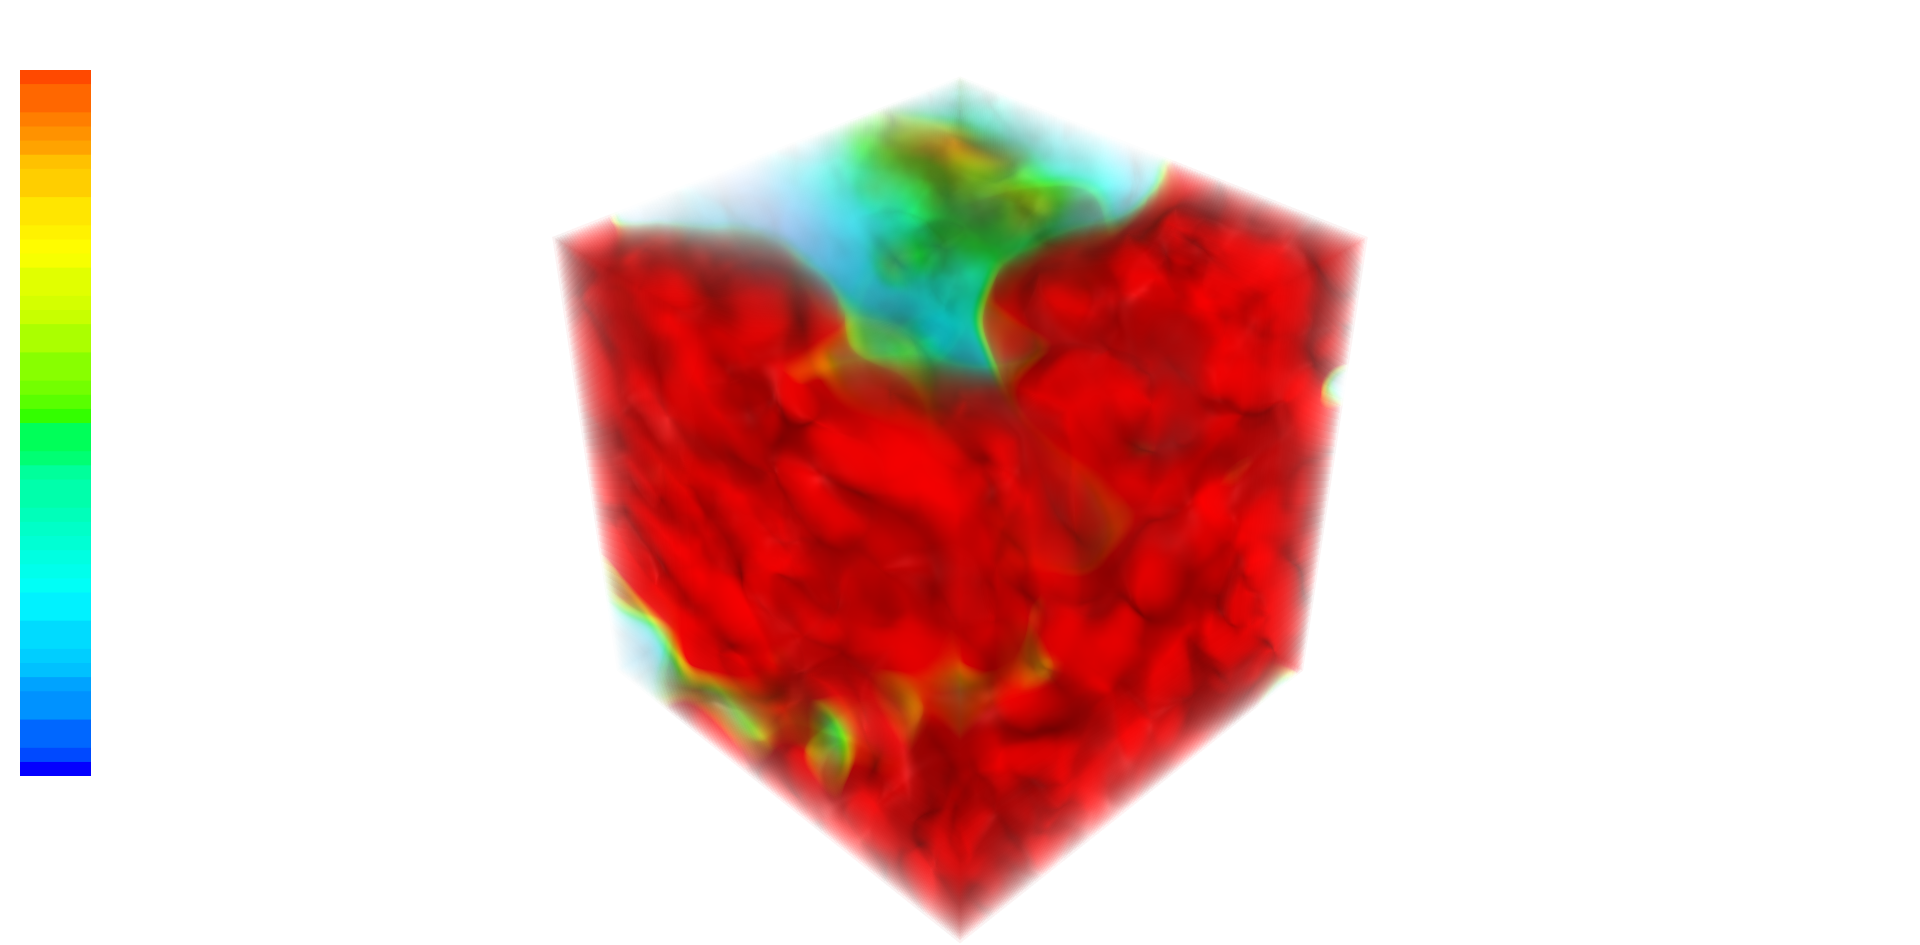

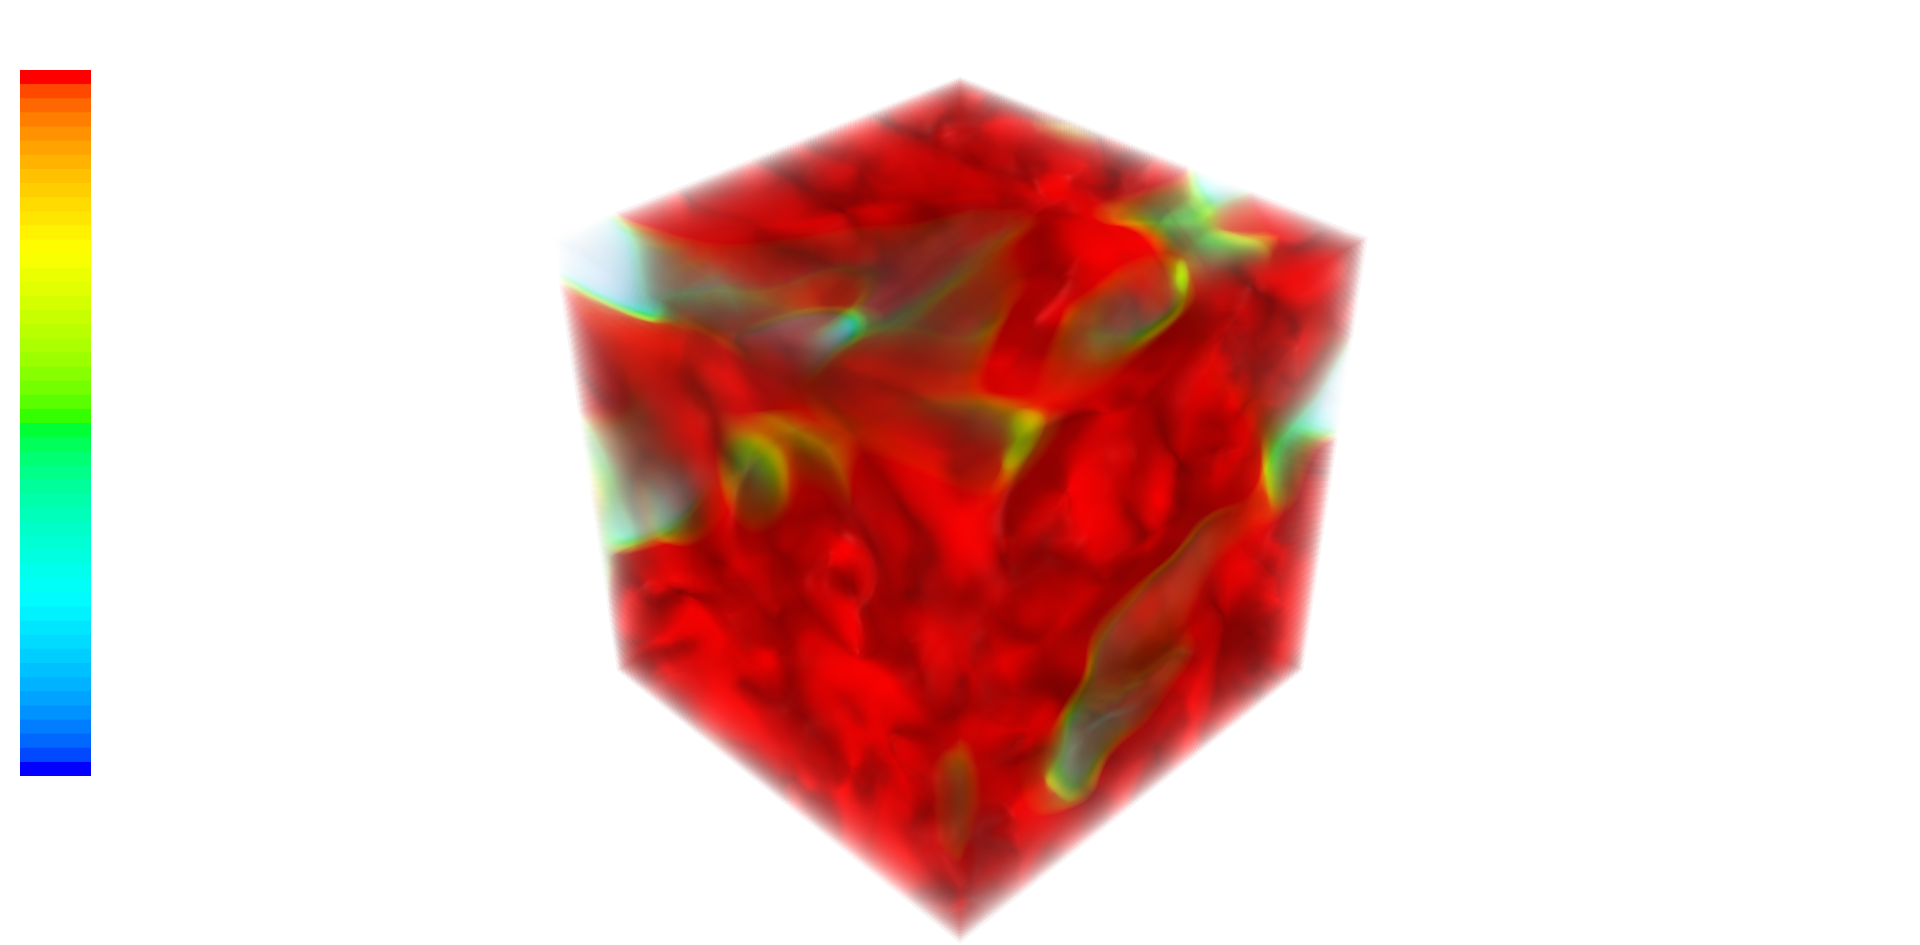

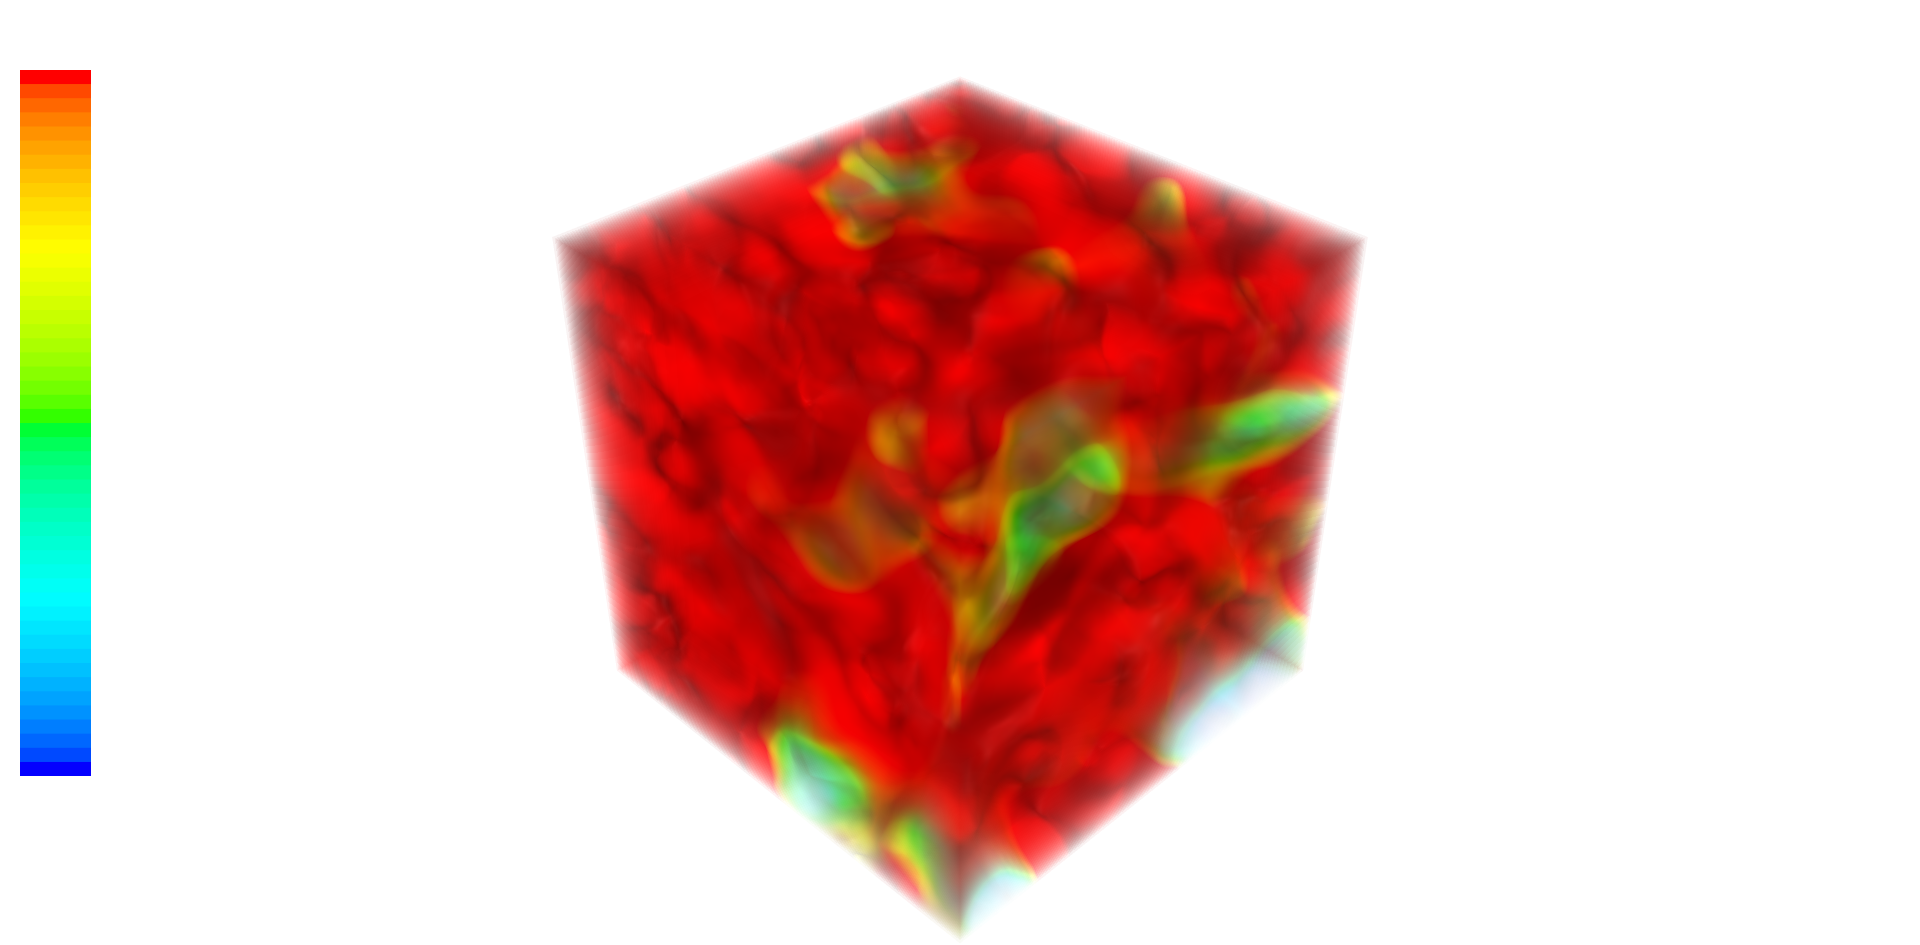

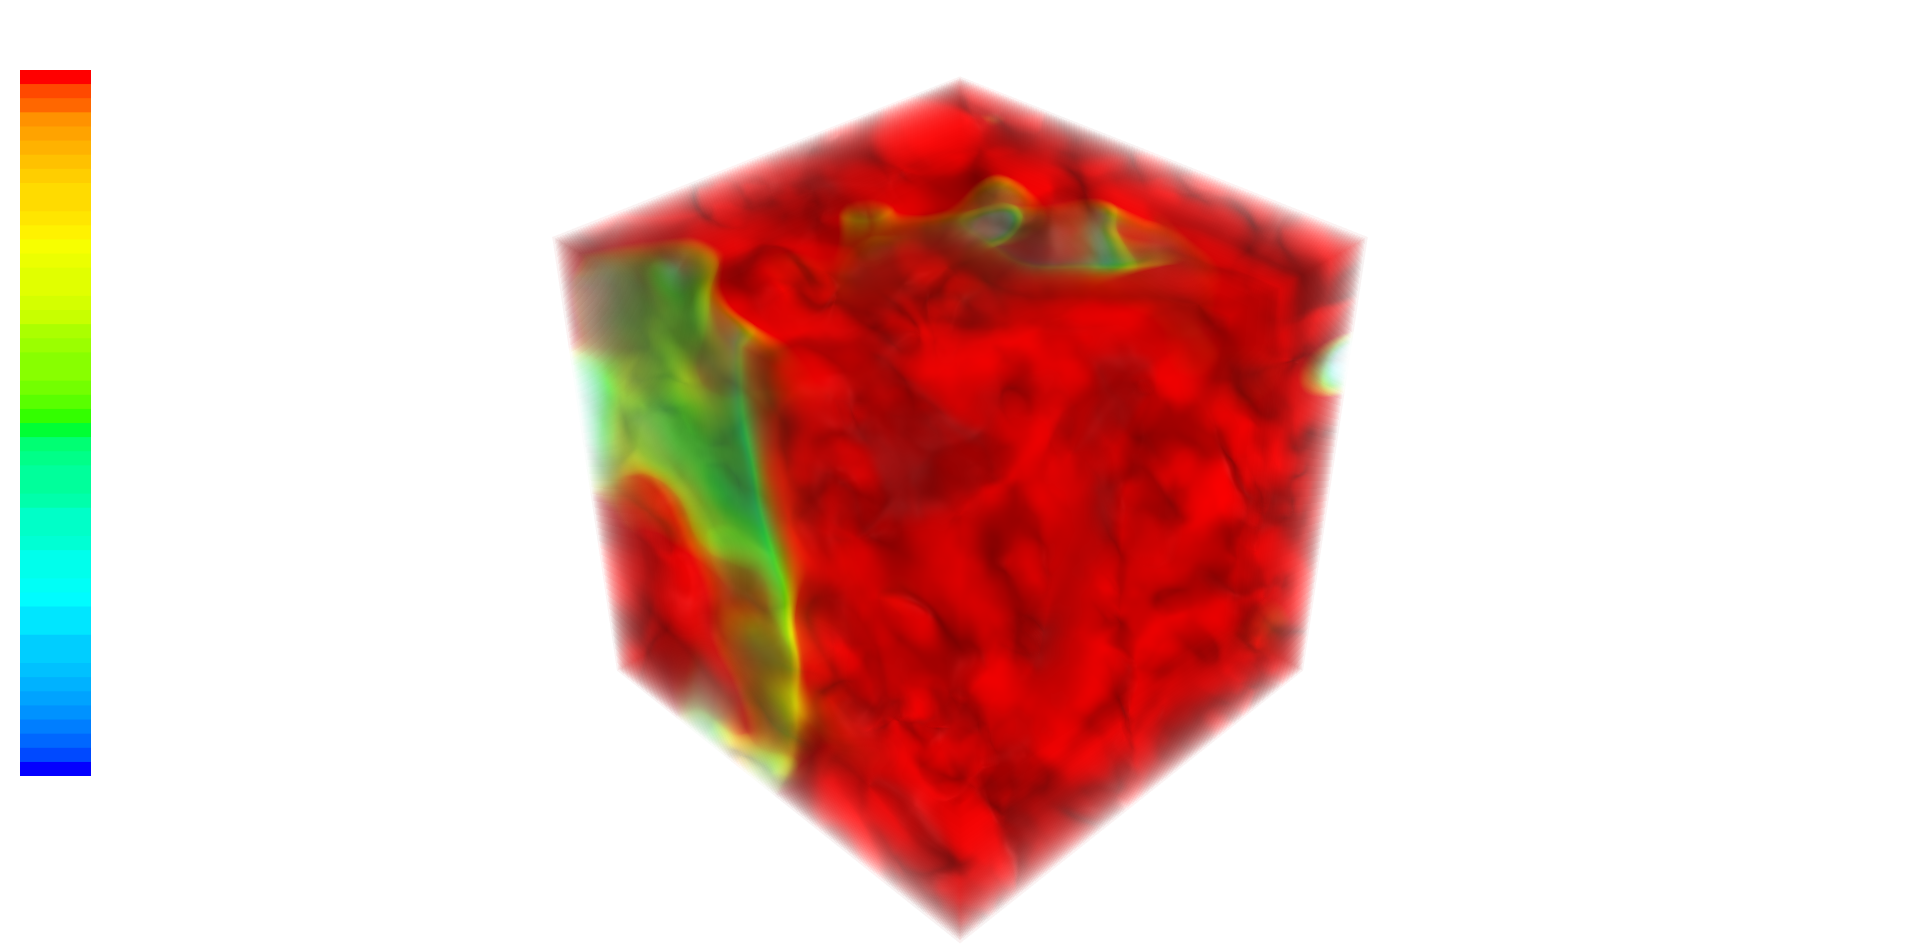

In [14]:
# Load and display images
for i in range(1, 5):
    file_name = f'snapshot{i}.png'
    display(Image(file_name))